# Step 1: Load the Data
Our main data set is stored in the `zillow_data.csv` spread sheet 

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('../data/zillow_data.csv', index_col='RegionID')

In [3]:
filtered = raw.query("City == 'Baltimore' and State == 'MD'")
print(filtered.shape)
filtered

(14, 271)


,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
66825,21215,Baltimore,MD,Baltimore,Baltimore City,317,53500.0,53500.0,53400.0,53300.0,...,59400,61400,63200,64100,65100,66800,67400,69500,72900,75000
66834,21224,Baltimore,MD,Baltimore,Baltimore City,442,49600.0,49400.0,49200.0,48900.0,...,156900,161000,165800,168800,171100,173800,176400,177900,177500,176600
66828,21218,Baltimore,MD,Baltimore,Baltimore City,606,44700.0,44700.0,44700.0,44700.0,...,73000,74500,76400,78100,81100,84800,88200,91800,96400,99900
66816,21206,Baltimore,MD,Baltimore,Baltimore City,678,73200.0,73300.0,73500.0,73600.0,...,113100,115700,118400,119800,121100,123400,126600,129600,132400,135200
66839,21229,Baltimore,MD,Baltimore,Baltimore City,1005,56000.0,56200.0,56500.0,56900.0,...,77300,80000,83000,84400,85400,86100,86500,88400,92400,95600
66840,21230,Baltimore,MD,Baltimore,Baltimore City,1450,59200.0,59100.0,59000.0,59000.0,...,216700,218700,221000,222800,225200,228000,231200,234400,236000,235900
66847,21239,Baltimore,MD,Baltimore,Baltimore City,2753,69700.0,69800.0,69900.0,70000.0,...,116600,121300,125800,128300,130300,131800,133400,135500,138100,140300
66822,21212,Baltimore,MD,Baltimore,Baltimore City,2808,107100.0,107000.0,106900.0,106800.0,...,249800,253000,258000,261300,263100,263500,263500,264200,265900,267100
66811,21201,Baltimore,MD,Baltimore,Baltimore City,3489,55700.0,55700.0,55700.0,55700.0,...,135200,136300,137600,138900,139400,139100,138300,137600,137500,137500


In [4]:
def make_time_series_df(time_series):
    str_index = time_series.index 
    dt_index = pd.to_datetime(str_index)
    time_series.index = dt_index
    df = pd.DataFrame(time_series)
    df.columns = ['MedianSales']
    return df

In [48]:
def make_row_dict(row):
    row_dict = row.iloc[1:6].to_dict()
    time_series = row.iloc[6:]
    df = make_time_series_df(time_series)
    df = df.fillna(df.bfill())
    row_dict['TimeSeries'] = df
    return row_dict

In [49]:
def load_data(df):
    model_dictionary = {}
    for ind in df.index.values:
        row = df.loc[ind]
        zip_code = row['RegionName']
        row_dict = make_row_dict(row)
        model_dictionary[zip_code] = row_dict
    return model_dictionary        

In [50]:
model_dictionary = load_data(filtered)

In [121]:
model_dictionary

{21215: {'City': 'Baltimore',
  'State': 'MD',
  'Metro': 'Baltimore',
  'CountyName': 'Baltimore City',
  'SizeRank': 317,
  'TimeSeries':            MedianSales
  1996-04-01       53500
  1996-05-01       53500
  1996-06-01       53400
  1996-07-01       53300
  1996-08-01       53300
  ...                ...
  2017-12-01       66800
  2018-01-01       67400
  2018-02-01       69500
  2018-03-01       72900
  2018-04-01       75000
  
  [265 rows x 1 columns]},
 21224: {'City': 'Baltimore',
  'State': 'MD',
  'Metro': 'Baltimore',
  'CountyName': 'Baltimore City',
  'SizeRank': 442,
  'TimeSeries':            MedianSales
  1996-04-01       49600
  1996-05-01       49400
  1996-06-01       49200
  1996-07-01       48900
  1996-08-01       48600
  ...                ...
  2017-12-01      173800
  2018-01-01      176400
  2018-02-01      177900
  2018-03-01      177500
  2018-04-01      176600
  
  [265 rows x 1 columns]},
 21218: {'City': 'Baltimore',
  'State': 'MD',
  'Metro': 'Balti

In [114]:
def make_test_train_split(model_dictionary, zip_code, split_date='2016'):
    time_series = model_dictionary[zip_code]['TimeSeries']
    split_datetime = pd.to_datetime(split_date)
    train = time_series[:split_datetime]
    test = time_series[split_datetime:]
    return train, test

In [115]:
train, test = make_test_train_split(model_dictionary, zip_code=21215)

In [119]:
train

,MedianSales
1996-04-01,53500
1996-05-01,53500
1996-06-01,53400
1996-07-01,53300
1996-08-01,53300
...,...
2015-09-01,58700
2015-10-01,56100
2015-11-01,54800
2015-12-01,54700


In [118]:
test.head()

,MedianSales
2016-01-01,54800
2016-02-01,55000
2016-03-01,56400
2016-04-01,58700
2016-05-01,60700


In [106]:
def make_time_series_plot(model_dictionary, zip_code):
    train, test = make_test_train_split(model_dictionary, zip_code)
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.plot(train);
    ax.plot(test);
    ax.legend(['Train', 'Test']);
    city_name = model_dictionary[zip_code]['City']
    state_abbreviation = model_dictionary[zip_code]['State']
    ax.set_title(f'Median Sale Price {city_name}, {state_abbreviation} {zip_code}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    return fig

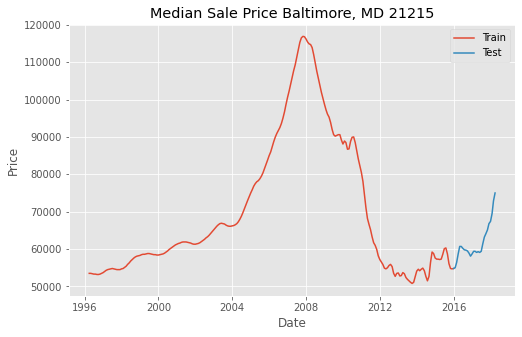

In [120]:
make_time_series_plot(model_dictionary, zip_code=21215);

In [108]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt

def make_acf_plot(model_dictionary, zip_code):
    city_name = model_dictionary[zip_code]['City']
    state_abbreviation = model_dictionary[zip_code]['State']
    train, test = make_test_train_split(model_dictionary, zip_code)
    fig, ax = plt.subplots(figsize=(16,3));
    plot_acf(
        x=train, 
        ax=ax, 
        lags=100,
        title=f'Autocorrelation for {city_name}, {state_abbreviation} {zip_code}'
    );
    return fig

def make_pacf_plot(model_dictionary, zip_code):
    city_name = model_dictionary[zip_code]['City']
    state_abbreviation = model_dictionary[zip_code]['State']
    train, test = make_test_train_split(model_dictionary, zip_code)
    fig, ax = plt.subplots(figsize=(16,3));
    plot_pacf(
        x=train, 
        ax=ax, 
        lags=100,
        title=f'Partial Autocorrelation for {city_name}, {state_abbreviation} {zip_code}'
    );
    return fig

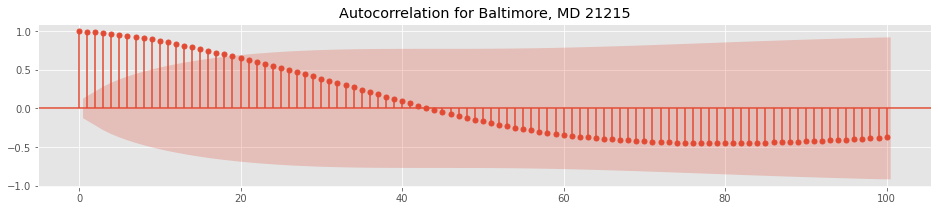

In [109]:
make_acf_plot(model_dictionary, zip_code=21215);

/home/schart/anaconda3/envs/flatiron/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


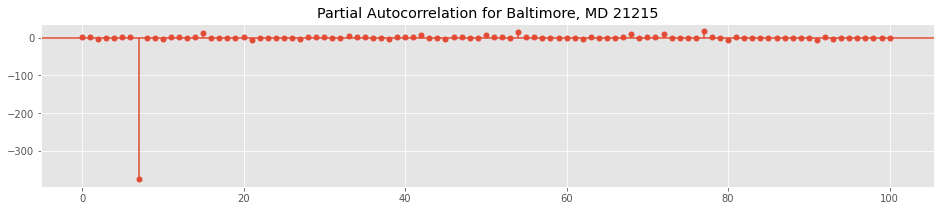

In [110]:
make_pacf_plot(model_dictionary, zip_code=21215);

# Step 2: Data Preprocessing

In [ ]:
melted = raw.melt(id_vars=raw.columns.values[:7], 
        value_vars=raw.columns.values[7:], 
        var_name='Date',
        value_name='MedianSales'
       )
melted.head()

In [ ]:
converted = melted.copy()
converted['Date'] = pd.to_datetime(melted['Date'])
print(converted.shape)
converted.head()

In [ ]:
cleaned = converted.dropna(subset=['MedianSales'])
print(cleaned.shape)
cleaned.head()

In [ ]:
grouped = cleaned.groupby('Date').agg({'MedianSales': 'mean'})
print(grouped.shape)
grouped.head()

# Step 3: EDA and Visualization

In [ ]:
grouped.plot()

In [ ]:




fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(grouped, ax=ax, lags=9);

# Step 4: ARIMA Modeling

In [ ]:
# Import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arima = SARIMAX(grouped, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), freq='MS')

In [ ]:
res_arima = mod_arima.fit()

In [ ]:
from itertools import combinations_with_replacement
best_aic = 1e16
best_model = None
for comb in combinations_with_replacement([0, 1, 2], 4):
    p, q, P, Q = comb
    mod_sarima = SARIMAX(grouped, order=(p, 1, q), seasonal_order=(P, 1, Q, 12), freq='MS')
    res_sarima = mod_sarima.fit()
    aic = res_sarima.aic
    if aic < best_aic:
        print(aic)
        best_aic = aic
        best_model = mod_sarima
        
        


In [ ]:
best_res = best_model.fit()

In [ ]:
print(best_res.summary())

In [ ]:
plt.plot(best_res.predict())

# Step 5: Interpreting Results